[  0 255]


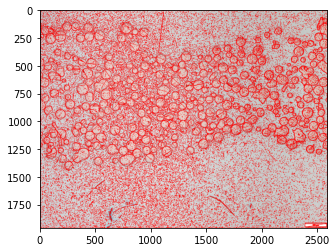

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('20-1.tif',cv.IMREAD_COLOR)
# img = cv.GaussianBlur(img,(3,3),0)
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
plt.imshow(gray)

thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,3,2)
# ret2,thresh = cv.threshold(gray,0,255,cv.THRESH_OTSU)

plt.imshow(thresh)
print(np.unique(thresh))
# mask = np.zeros((gray.shape),np.uint8)
# kernel1 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(11,11))
# close = cv.morphologyEx(gray,cv.MORPH_CLOSE,kernel1,iterations=1)
# div = np.float32(gray)/(close)
# res = np.uint8(cv.normalize(div,div,0,255,cv.NORM_MINMAX))
# res2 = cv.cvtColor(res,cv.COLOR_GRAY2RGB)
# plt.imshow(res2)

contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# For each contour, find the convex hull and draw it
# on the original image.
for i in range(len(contours)):
    hull = cv.convexHull(contours[i])
    cv.drawContours(img, [hull], -1, (255, 0, 0), 2)
plt.imshow(img)

# Display the final convex hull image
# cv.imshow('ConvexHull', img)
# cv.waitKey(0)


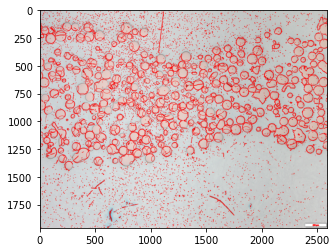

In [2]:
img = cv.imread('20-1.tif',cv.IMREAD_COLOR)

max_area = 0
best_cnt = None
for cnt in contours:
    area = cv.contourArea(cnt)
    if area > 3:
        # cv.drawContours(img,[cnt],0,(255, 0, 0), 2)
        if cnt.shape[0]>4:
            ellipse = cv.fitEllipse(cnt)
            # x,y,w,h = cv.boundingRect(cnt)
            # cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            if np.all(np.array(ellipse[1])<70):
                cv.ellipse(img,ellipse,(255,0,0),2)
# cv.drawContours(img,[best_cnt],-1,(0, 255, 0), 2)
# res = cv.bitwise_and(res,img)
plt.imshow(img)
